In [2]:
import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.Preprocessing import *
from utils.Plots import *
from utils.Segmentation import *

In [ ]:
# #Load the ESP1 Data and handle missing values
# df_one= pd.read_csv('../../data/handlebar/Accelerometer_data_merged_ESP1.csv')  
# missing_info = handle_missing_values_length_index(df_one)
# print(missing_info)
# output = '../../data/handlebar/Accelerometer_data_merged_ESP1_filled_missing_values.csv'
# fill_missing_values(df_one, output)
# missing_info = handle_missing_values_length_index(df_one)
# print(missing_info)


In [ ]:
# # Load the ESP2 Data and handle missing values
# df_two= pd.read_csv('../../data/handlebar/Accelerometer_data_merged_ESP2.csv')  
# missing_info = handle_missing_values_length_index(df_two)
# print(missing_info)
# output = '../../data/handlebar/Accelerometer_data_merged_ESP2_filled_missing_values.csv'
# fill_missing_values(df_two,output)
# missing_info = handle_missing_values_length_index(df_two)
# print(missing_info)


In [ ]:
# # Comine activities from ESP1 and ESP2 with correct Annotation
# output = '../../data/handlebar/Accelerometer_data_combined.csv'
# df_one= pd.read_csv('../../data/handlebar/Accelerometer_data_merged_ESP1_filled_missing_values.csv')
# df_two= pd.read_csv('../../data/handlebar/Accelerometer_data_merged_ESP2_filled_missing_values.csv')
# df_combined = combine_activities(df_one,df_two,output)

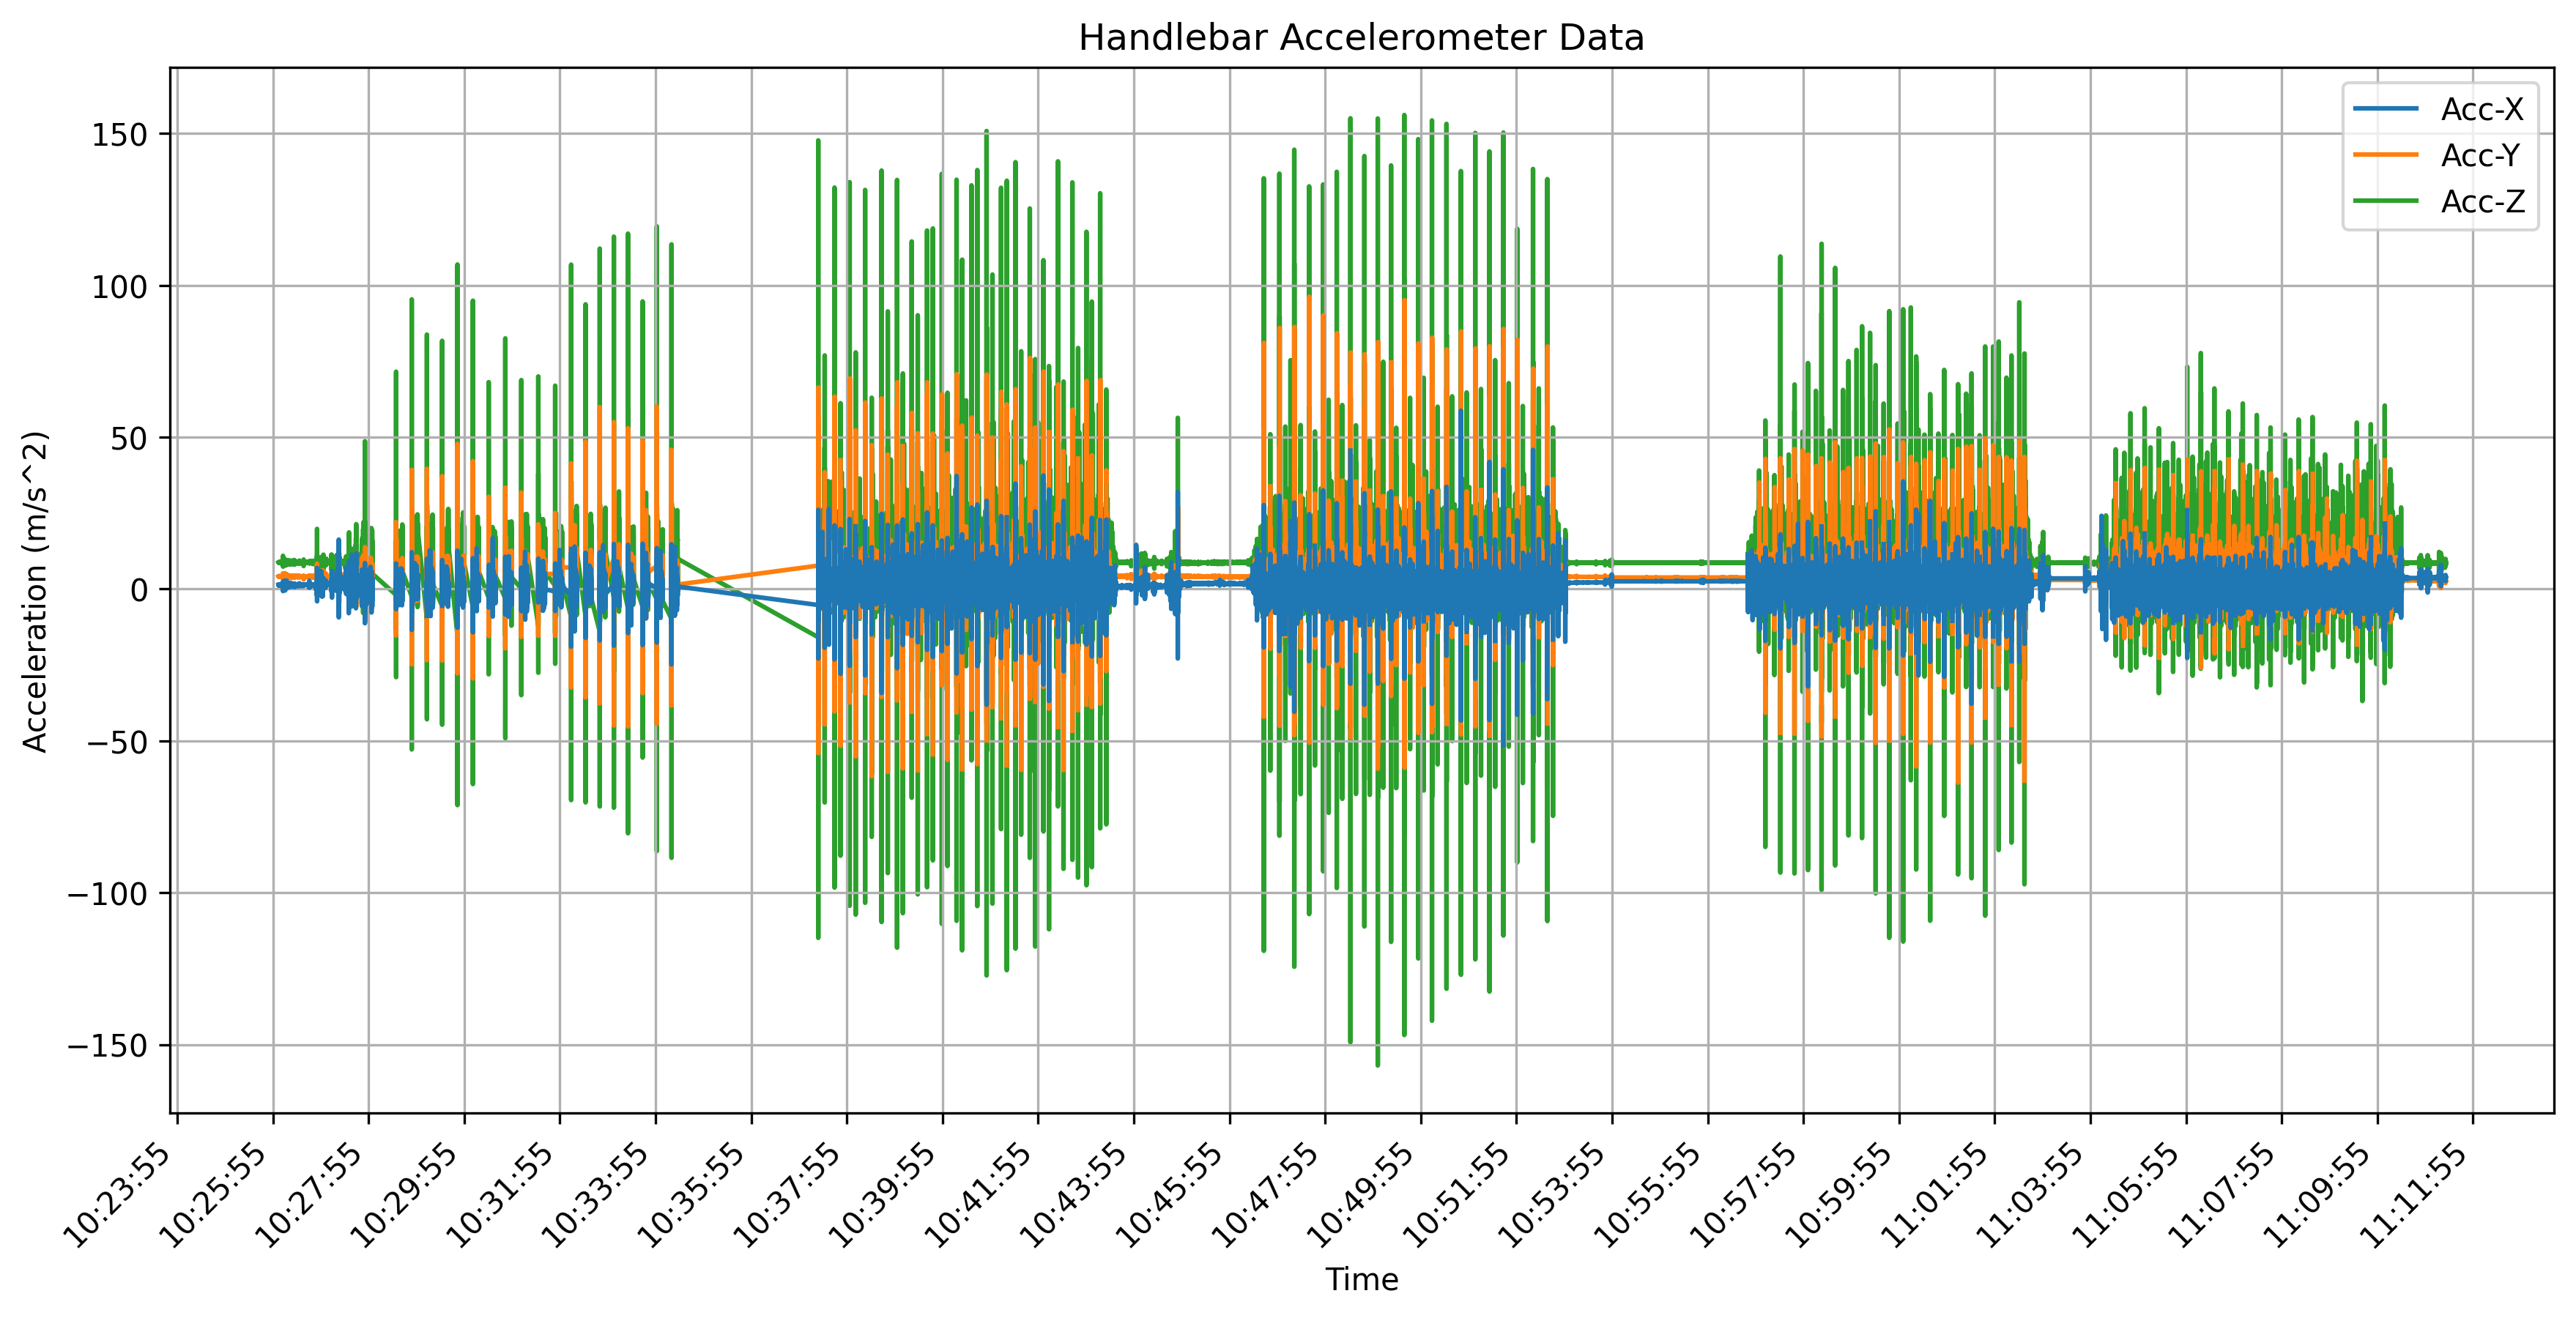

In [ ]:
# # plot the combined data
# df= pd.read_csv('../../data/handlebar/Accelerometer_data_combined.csv')
# name = 'Handlebar Accelerometer Data'
# plot_accelerometer_data(df, name)

In [9]:
# No overlapping segmentation and normal/abnormal classification
# df= pd.read_csv('../../data/handlebar/Accelerometer_data_combined.csv')
# output = '../../data/handlebar/Accelerometer_data_combined_segmented.csv'
# # Filter the DataFrame to include only the necessary columns
# df_filtered = df[['NTP','Acc-Z','curb_scene']]
# final_df = segment_acceleration_data_no_overlapping(df_filtered, output)

In [11]:
# No overlapping segmentation 
df= pd.read_csv('../../data/handlebar/Accelerometer_data_combined.csv')
df

,Unnamed: 0,NTP,Acc-X,Acc-Y,Acc-Z,Timestamp_unix,curb_activity,curb_scene,curb_height_down,curb_height_up,curb_type_down,curb_type_up,roughness
0,0,2024-07-24 10:26:01.863,1.417374,4.161118,8.762772,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
1,1,2024-07-24 10:26:01.867,1.393433,4.161118,8.753204,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
2,2,2024-07-24 10:26:01.872,1.407791,4.165909,8.762772,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
3,3,2024-07-24 10:26:01.877,1.446091,4.170700,8.781937,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
4,4,2024-07-24 10:26:01.884,1.417374,4.175491,8.753204,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465971,549101,2024-07-24 11:11:20.851,3.806778,2.609680,8.777145,1.721819e+12,1.0,0.0,3.0,1.0,2.0,1.0,0.0
465972,549102,2024-07-24 11:11:20.857,3.758896,2.652771,8.681381,1.721819e+12,1.0,0.0,3.0,1.0,2.0,1.0,0.0
465973,549103,2024-07-24 11:11:20.866,3.763687,2.796432,8.370132,1.721819e+12,1.0,0.0,3.0,1.0,2.0,1.0,0.0
465974,549104,2024-07-24 11:11:20.870,3.734955,2.839523,8.307877,1.721819e+12,1.0,0.0,3.0,1.0,2.0,1.0,0.0


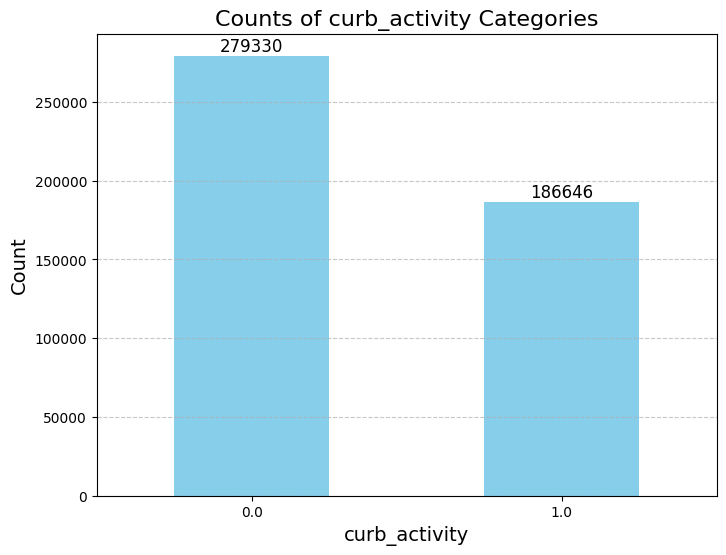

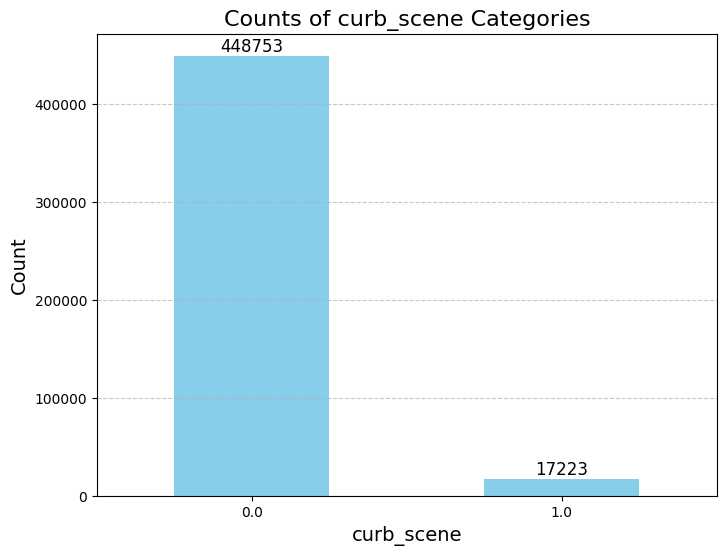

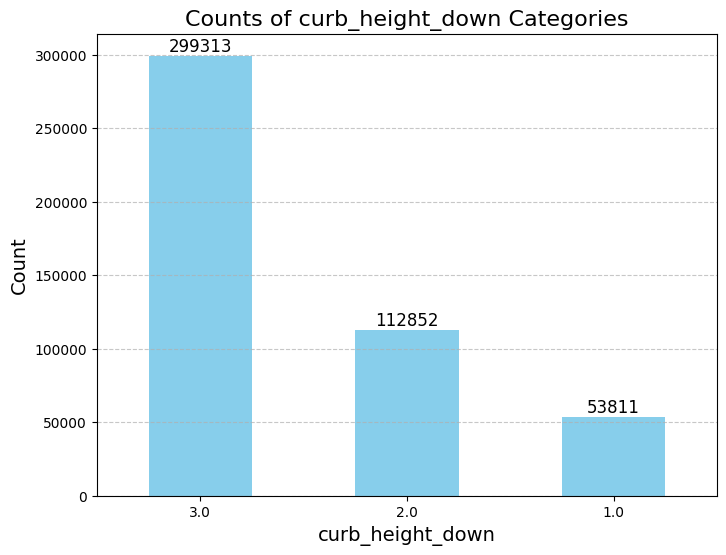

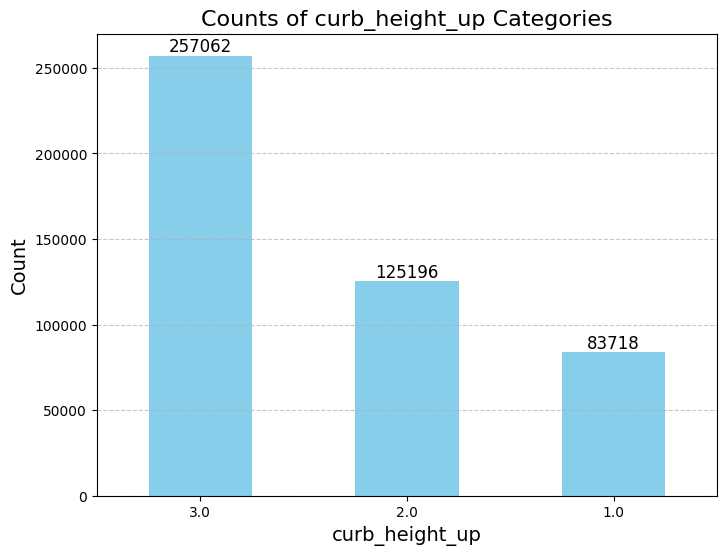

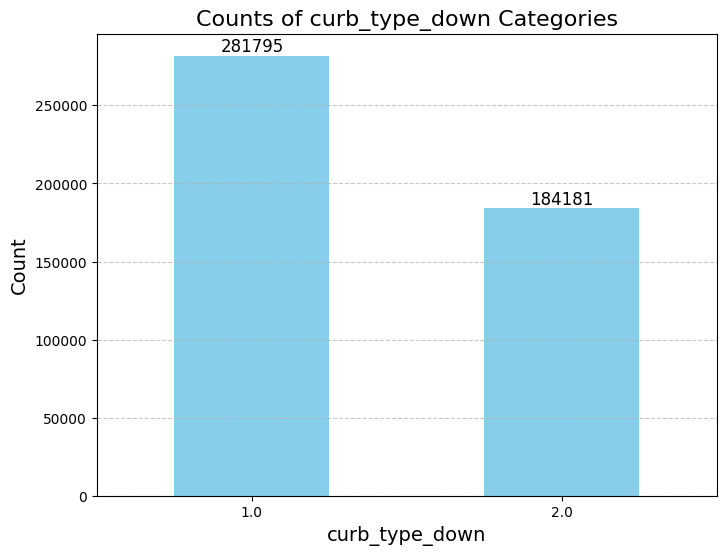

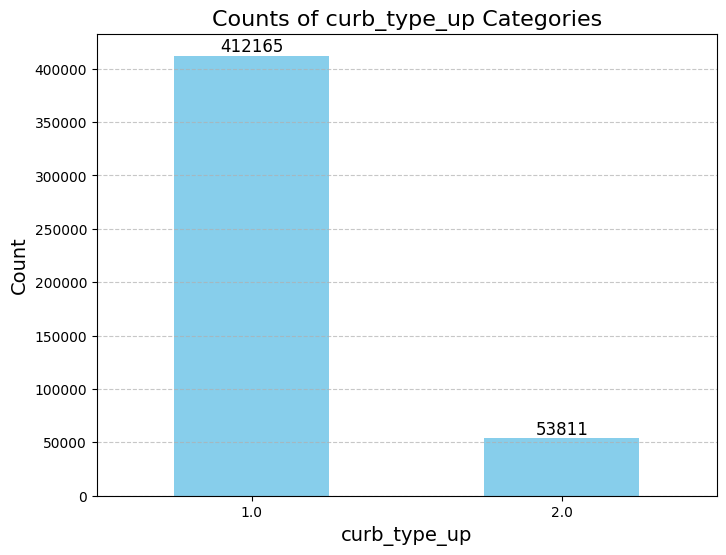

In [ ]:
# List of attributes to visualize
attributes = ['curb_activity', 'curb_scene', 'curb_height_down', 'curb_height_up', 'curb_type_down', 'curb_type_up']

# Create a 3x2 grid for the plots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Loop through each attribute and create a bar chart
for i, attribute in enumerate(attributes):
    # Get value counts for the attribute
    attribute_counts = df[attribute].value_counts()

    # Plot the value counts as a bar chart
    bars = attribute_counts.plot(kind='bar', color='skyblue', ax=axes[i])
    axes[i].set_title(f'Counts of {attribute}', fontsize=14)
    axes[i].set_xlabel(attribute, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Add count numbers on top of the bars
    for bar in bars.patches:
        axes[i].text(
            bar.get_x() + bar.get_width() / 2,  # X-coordinate
            bar.get_height() + 1,               # Y-coordinate (slightly above the bar)
            int(bar.get_height()),              # Text (the count)
            ha='center', va='bottom', fontsize=10
        )

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [2]:
df= pd.read_csv('../../data/handlebar/Accelerometer_data_combined.csv')
# Filter the DataFrame to include only the necessary columns
df_filtered = df[['NTP','Acc-Z','curb_scene']]
final_df = segment_acceleration_data_overlapping_count_index(df_filtered, 20)

In [3]:
df= pd.read_csv('../../data/handlebar/Accelerometer_data_combined.csv')
# Filter the DataFrame to include only the necessary columns
df_filtered = df[['NTP','Acc-Z','curb_scene']]
final_df = segment_acceleration_data_overlapping_count_index(df_filtered, 30)

In [4]:
df= pd.read_csv('../../data/handlebar/Accelerometer_data_combined.csv')
# Filter the DataFrame to include only the necessary columns
df_filtered = df[['NTP','Acc-Z','curb_scene']]
final_df = segment_acceleration_data_overlapping_count_index(df_filtered, 50)